<a href="https://colab.research.google.com/github/gavrieldavidov/gavriel/blob/main/project_House_price_sales_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Sales in King County, USA Data Analysis (EDA)

## Introduction

### About the Dataset

* This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

### Tasks

* To conduct a general EDA, and further understand House price sales USA dataset / develop intuition of our data
* Performance in perspective of time in 2014 - 2015
* Analysis of various effects on the price of the apartment

## Preparation

### Loading the Libraries

Loading Python relevant libraries

In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Loading the Data

Loading the sales dataset into a DataFrame

In [ ]:
salesusa = pd.read_csv('/content/drive/MyDrive/python analyst/pandas /project/kc_house_data.csv')

### Understanding the Data

A few basic details - what is the data-shape in terms of columns & rows, and what details can be found in each column

#### Data Shape

In [ ]:
print(f'This Dataframe has {salesusa.shape[0]} rows over {salesusa.shape[1]} columns')

This Dataframe has 21613 rows over 21 columns


#### Show the first 5 lines

In [ ]:
salesusa.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.00",3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,"538,000.00",3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,"180,000.00",2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,"604,000.00",4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,"510,000.00",3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


#### Data Dictionary

* **id** - Unique ID for each home sold
* **date** - Date of the home sale
* **price** - Price of each home sold
* **bedrooms** - Number of bedrooms
* **bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* **sqft_living** - Square footage of the apartments interior living space
* **sqft_lot** - Square footage of the land space
* **floors** - Number of floors
* **waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not
* **view** - An index from 0 to 4 of how good the view of the property was
* **condition** - An index from 1 to 5 on the condition of the apartment
* **grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* **sqft_above** - The square footage of the interior housing space that is above ground level
* **sqft_basement** - The square footage of the interior housing space that is below ground level
* **yr_built** - The year the house was initially built
* **yr_renovated** - The year of the house’s last renovation
* **zipcode** - What zipcode area the house is in
* **lat** - Lattitude
* **long** - Longitude
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

### Cleanup

#### Null Values

This dataset doesn't contain any NaN values, so further cleanup in this area is not required

In [ ]:
salesusa.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Validating Datatypes

In [ ]:
salesusa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Transforming the date into a valid datetime object

In [ ]:
salesusa['date'] = pd.to_datetime(salesusa['date'])

In [ ]:
salesusa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

#### Duplicates Rows

In [ ]:
salesusa.nunique()

id               21436
date               372
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

Number of unique values in id should be equal to the number of rows - 21613. <br> 
Lets undertand the reason its not

In [ ]:
pd.set_option('display.max_rows', 10)

In [ ]:
salesusa[salesusa['id'].duplicated()].sort_values('id').head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2497,1000102,2015-04-22,"300,000.00",6,3.00,2400,9373,2.00,0,0,...,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
16815,7200179,2015-04-24,"175,000.00",2,1.00,840,12750,1.00,0,0,...,6,840,0,1925,0,98055,47.48,-122.21,1480,6969
11434,109200390,2014-10-20,"250,000.00",3,1.75,1480,3900,1.00,0,0,...,7,1480,0,1980,0,98023,47.30,-122.37,1830,6956
12418,123039336,2014-12-08,"244,900.00",1,1.00,620,8261,1.00,0,0,...,5,620,0,1939,0,98106,47.51,-122.36,1180,8244
7793,251300110,2015-01-14,"358,000.00",3,2.25,2510,12013,2.00,0,0,...,8,2510,0,1988,0,98003,47.35,-122.31,1870,8017


We can be seen that there are duplications in the id column, because the same house was sold twice but in different years

In [ ]:
salesusa[salesusa['zipcode'].duplicated()].sort_values('zipcode').head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12927,7968000120,2014-05-09,"290,000.00",4,2.50,2000,13300,1.00,0,0,...,7,1200,800,1968,0,98001,47.35,-122.29,1800,9810
14501,3353402390,2015-05-01,"171,500.00",3,1.00,1150,6480,1.50,0,0,...,5,1150,0,1946,0,98001,47.26,-122.26,1100,7300
3111,3751600176,2015-03-06,"196,000.00",3,1.50,1000,18568,1.00,0,0,...,6,1000,0,1989,0,98001,47.30,-122.27,1610,17420
14514,8001210120,2014-09-16,"234,500.00",4,2.50,1960,7875,1.00,0,0,...,7,1220,740,1978,0,98001,47.34,-122.27,2030,7650
9464,5647900120,2014-06-13,"250,600.00",4,2.50,1930,8660,1.00,0,0,...,7,1120,810,1981,0,98001,47.33,-122.26,1830,9591


#### Drop unnecessary columns

The bathrooms, and sqft_living15, sqft_lot15 do not contain any usefull data for this analysis, so we can drop them.

In [ ]:
salesusa.drop(['bathrooms','sqft_living15','sqft_lot15'], axis=1, inplace=True)

#### Creating a cleanup function for future reads

In [ ]:
def load_salesusa():
  salesusa = pd.read_csv('/content/drive/MyDrive/python analyst/pandas /project/kc_house_data.csv')
  salesusa['date'] = pd.to_datetime(salesusa['date'])
  salesusa.drop(['bathrooms','sqft_living15','sqft_lot15'], axis=1, inplace=True)
  return salesusa

In [ ]:
salesusa = load_salesusa() 

In [ ]:
salesusa.head()

,id,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,2014-10-13,"221,900.00",3,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26
1,6414100192,2014-12-09,"538,000.00",3,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32
2,5631500400,2015-02-25,"180,000.00",2,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23
3,2487200875,2014-12-09,"604,000.00",4,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39
4,1954400510,2015-02-18,"510,000.00",3,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05


## EDA

### Categorical, Quantitative

In [ ]:
salesusa.columns

Index(['id', 'date', 'price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

In [ ]:
categorical = ['waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated']
numerical   = ['price', 'bedrooms', 'floors','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

### Univariate Analysis

#### Summary Statistics

In [ ]:
df=salesusa.describe()
df.drop(['id','view', 'condition', 'grade', 'yr_built', 'waterfront', 'yr_renovated', 'zipcode' ,'lat' ,'long'], axis=1, inplace=True)

we are drop this columns from the describe, because they are not columns that can be statistically calculated 

In [ ]:
df.transpose()

,count,mean,std,min,25%,50%,75%,max
price,"21,613.00","540,182.16","367,362.23","75,000.00","321,950.00","450,000.00","645,000.00","7,700,000.00"
bedrooms,"21,613.00",3.37,0.93,0.00,3.00,3.00,4.00,33.00
sqft_living,"21,613.00","2,079.90",918.44,290.00,"1,427.00","1,910.00","2,550.00","13,540.00"
sqft_lot,"21,613.00","15,106.97","41,420.51",520.00,"5,040.00","7,618.00","10,688.00","1,651,359.00"
floors,"21,613.00",1.49,0.54,1.00,1.00,1.50,2.00,3.50
sqft_above,"21,613.00","1,788.39",828.09,290.00,"1,190.00","1,560.00","2,210.00","9,410.00"
sqft_basement,"21,613.00",291.51,442.58,0.00,0.00,0.00,560.00,"4,820.00"


#### Summary Statistics Observations

<div style='background:coral;font-size:15px'> 

<b> Initial Observations: </b>
* <b> price </b>
    * Apartment prices range in 75K to 7700K, , most of the prices (75%) are up to 645K.
* <b> sqft_living / sqft_lot </b>
    * Apartment sqft_living range in 290 to 13540, , most of the sqft_living (75%) are up to 2500.
    * This average is 2079 sqft_living.
* <b> Bedrooms </b>
    * Bedrooms range in 0 to 33, , most of the bedrooms (75%) are up to 4. <br>
    
</div>

<b> House with high sqft_living </b>

In [ ]:
sqft_living_filter = salesusa['sqft_living']>10000
salesusa[sqft_living_filter]

,id,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
3914,9808700762,2014-06-11,"7,060,000.00",5,10040,37325,2.00,1,2,3,11,7680,2360,1940,2001,98004,47.65,-122.21
7252,6762700020,2014-10-13,"7,700,000.00",6,12050,27600,2.50,0,3,4,13,8570,3480,1910,1987,98102,47.63,-122.32
12777,1225069038,2014-05-05,"2,280,000.00",7,13540,307752,3.00,0,4,3,12,9410,4130,1999,0,98053,47.67,-121.99


<b> House with high bedrooms </b>

It can be seen that the houses with the high toilets price is accordingly and the sqft_living

In [ ]:
bedrooms_filter = salesusa['bedrooms']>10
salesusa[bedrooms_filter]

,id,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
8757,1773100755,2014-08-21,"520,000.00",11,3000,4960,2.00,0,0,3,7,2400,600,1918,1999,98106,47.56,-122.36
15870,2402100895,2014-06-25,"640,000.00",33,1620,6000,1.00,0,0,5,7,1040,580,1947,0,98103,47.69,-122.33


<b> House with high price </b>

We can see thet houses is a very big house with 5 bedrooms and waterfront 

In [ ]:
price_filter = salesusa['price']>7000000
salesusa[price_filter]

,id,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
3914,9808700762,2014-06-11,"7,060,000.00",5,10040,37325,2.00,1,2,3,11,7680,2360,1940,2001,98004,47.65,-122.21
7252,6762700020,2014-10-13,"7,700,000.00",6,12050,27600,2.50,0,3,4,13,8570,3480,1910,1987,98102,47.63,-122.32


<b> House with 0 bedrooms </b>

These rows look like buildings with shared toilets

In [ ]:
bed_filter=salesusa['bedrooms']==0
salesusa[bed_filter].head(2)

,id,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
875,6306400140,2014-06-12,"1,100,000.00",0,3064,4764,3.50,0,2,3,7,3064,0,1990,0,98102,47.64,-122.32
3119,3918400017,2015-02-05,"380,000.00",0,1470,979,3.00,0,2,3,8,1470,0,2006,0,98133,47.71,-122.36


#### Visualizing the Data Distribution

In [ ]:
def show_distribution(df, column):
    fig, axes = plt.subplots(1,2, figsize=(15, 5))
    
    text  = 'Std dev: ' + str(round(df[column].std(), 2)) + '\n'
    text += 'Mean: ' + str(round(df[column].mean(), 2)) + '\n'
    text += 'Median: ' + str(round(df[column].median(), 2)) + '\n'

    fig.suptitle(column)
    
    # Histogram
    num_bins = int(round(df[column].count()**(1/3)*2, 0))
    sns.histplot(salesusa[column], bins=num_bins, ax=axes[0])
    axes[0].set_title('Distribution I')
    axes[0].text(0.35, 0.5, text, fontsize=10, transform=plt.gcf().transFigure)
    
    # Box Plot
    sns.boxplot(x=column,
                data=salesusa, 
                showmeans=True,
                meanline=True,
                meanprops={'color':'white'},
                ax=axes[1])
    axes[1].set_title('Distribution II')

    plt.show()

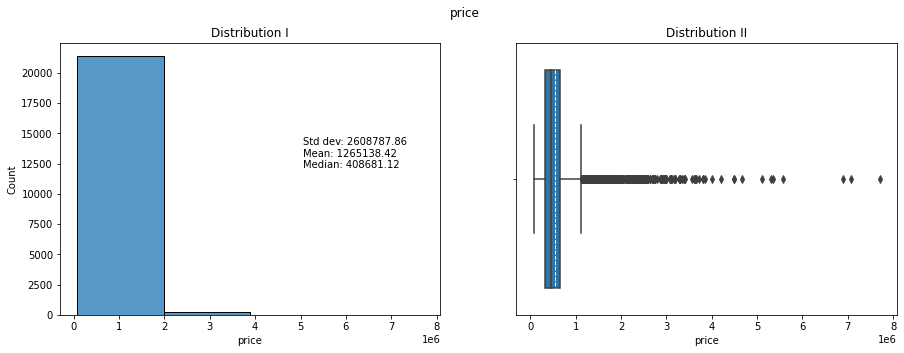

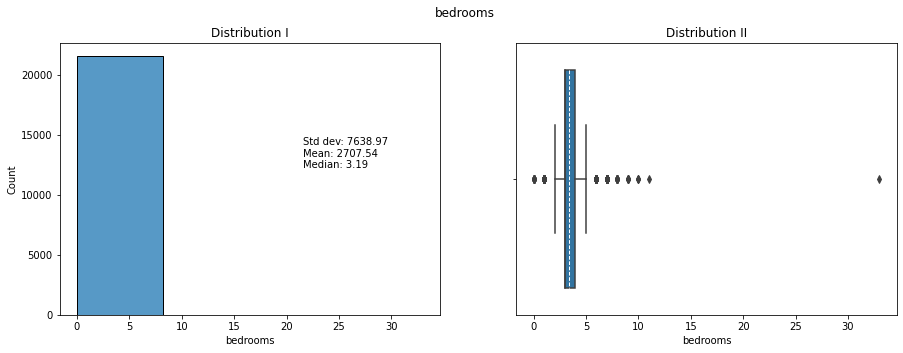

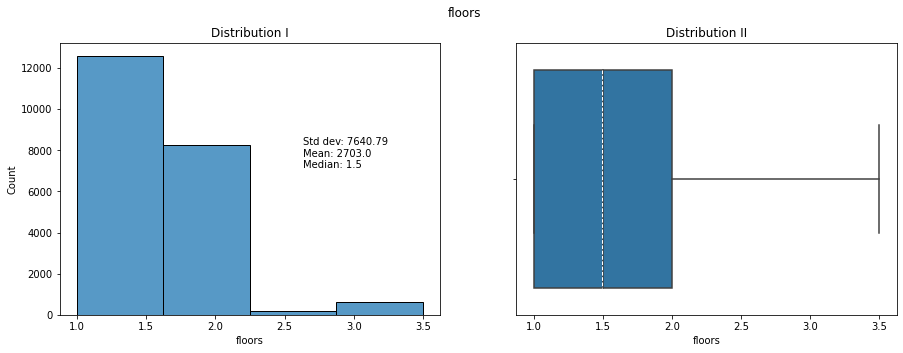

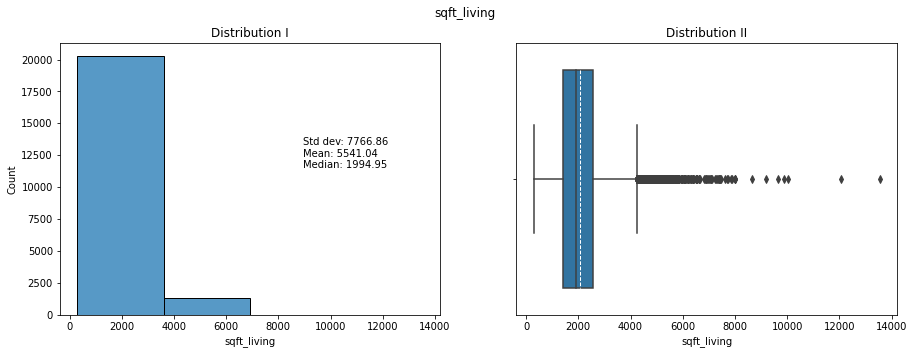

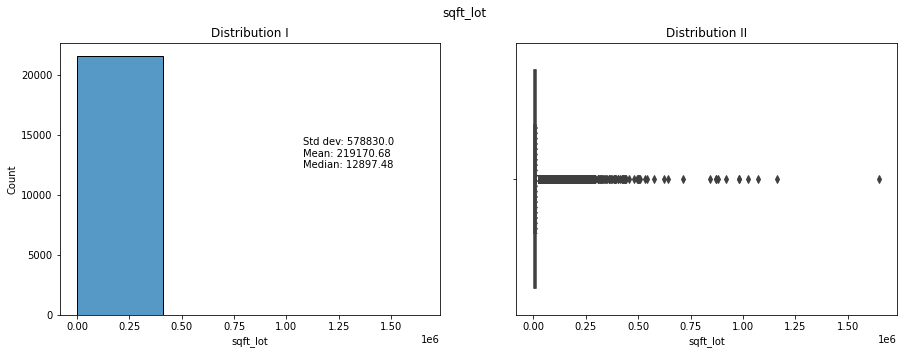

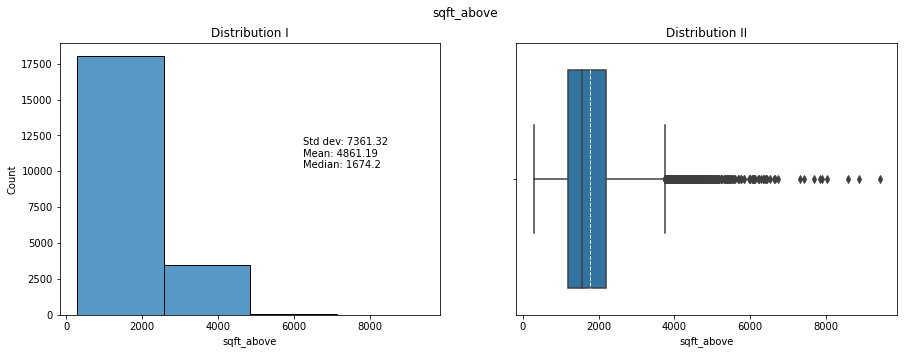

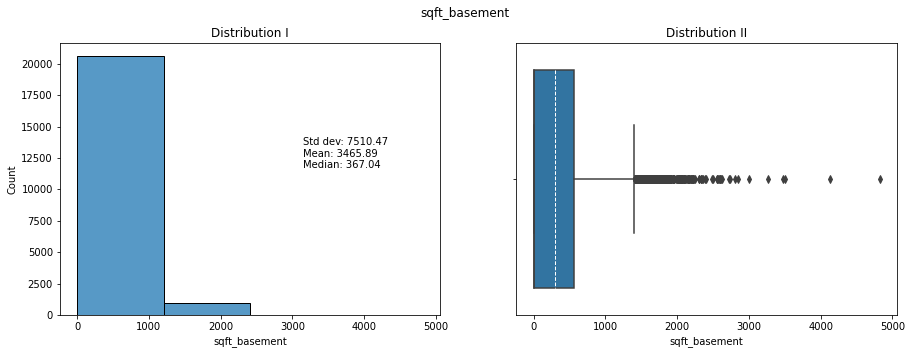

In [ ]:
for column in numerical:
    show_distribution(df,column)

#### Categorical Counts

##### sales house by each waterfront

In [ ]:
g1 = salesusa.groupby('waterfront').agg(numofsales = ('id','size'),
                                   pct = ('id',lambda x:x.count()/salesusa['id'].size))\
.sort_values('pct',ascending=False)

g2 = salesusa.agg(numofsales = ('id','size'),
        pct = ('id',lambda x:x.count() / salesusa['id'].size)).transpose()\
.rename(index={'id': 'Total'})

res = pd.concat([g1,g2])
res.assign(numofsales = res['numofsales'].astype(int))\
.style.format({'pct': "{:.2%}"})

,numofsales,pct
0,21450,99.25%
1,163,0.75%
Total,21613,100.00%


##### sales house by each view

* An index from 0 to 4 of how good the view of the property was

In [ ]:
g1 = salesusa.groupby('view').agg(numofsales = ('id','size'),
                                   pct = ('id',lambda x:x.count()/salesusa['id'].size))\
.sort_values('pct',ascending=False)

g2 = salesusa.agg(numofsales = ('id','size'),
        pct = ('id',lambda x:x.count() / salesusa['id'].size)).transpose()\
.rename(index={'id': 'Total'})

res = pd.concat([g1,g2])
res.assign(numofsales = res['numofsales'].astype(int))\
.style.format({'pct': "{:.2%}"})

,numofsales,pct
0,19489,90.17%
2,963,4.46%
3,510,2.36%
1,332,1.54%
4,319,1.48%
Total,21613,100.00%


##### sales house by each condition

* An index from 1 to 5 on the condition of the apartment

In [ ]:
g1 = salesusa.groupby('condition').agg(numofsales = ('id','size'),
                                   pct = ('id',lambda x:x.count()/salesusa['id'].size))\
.sort_values('pct',ascending=False)

g2 = salesusa.agg(numofsales = ('id','size'),
        pct = ('id',lambda x:x.count() / salesusa['id'].size)).transpose()\
.rename(index={'id': 'Total'})

res = pd.concat([g1,g2])
res.assign(numofsales = res['numofsales'].astype(int))\
.style.format({'pct': "{:.2%}"})

,numofsales,pct
3,14031,64.92%
4,5679,26.28%
5,1701,7.87%
2,172,0.80%
1,30,0.14%
Total,21613,100.00%


##### sales house by each grade

* An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design

In [ ]:
g1 = salesusa.groupby('grade').agg(numofsales = ('id','size'),
                                   pct = ('id',lambda x:x.count()/salesusa['id'].size))\
.sort_values('pct',ascending=False)

g2 = salesusa.agg(numofsales = ('id','size'),
        pct = ('id',lambda x:x.count() / salesusa['id'].size)).transpose()\
.rename(index={'id': 'Total'})

res = pd.concat([g1,g2])
res.assign(numofsales = res['numofsales'].astype(int))\
.style.format({'pct': "{:.2%}"})

,numofsales,pct
7,8981,41.55%
8,6068,28.08%
9,2615,12.10%
6,2038,9.43%
10,1134,5.25%
11,399,1.85%
5,242,1.12%
12,90,0.42%
4,29,0.13%
13,13,0.06%


##### sales house by each yr_built

* 1900-2014

In [ ]:
g1 = salesusa.groupby('yr_built').agg(numofsales = ('id','size'),
                                   pct = ('id',lambda x:x.count()/salesusa['id'].size))\
.sort_values('pct',ascending=False)

g2 = salesusa.agg(numofsales = ('id','size'),
        pct = ('id',lambda x:x.count() / salesusa['id'].size)).transpose()\
.rename(index={'id': 'Total'})

res = pd.concat([g1,g2]).head()
res.assign(numofsales = res['numofsales'].astype(int))\
.style.format({'pct': "{:.2%}"})

,numofsales,pct
2014,559,2.59%
2006,454,2.10%
2005,450,2.08%
2004,433,2.00%
2003,422,1.95%


In [ ]:
categorical = ['waterfront','view', 'condition', 'grade', 'yr_built']

In [ ]:
def show_counts(df, column):
    plt.figure(figsize=(15,8))
    ax = sns.countplot(x=column,
                       data=salesusa, 
                       order = salesusa[column].value_counts().index)
    ax.set_title(column)
    ax.tick_params(axis='x', rotation=90)
    for p in ax.patches:
            ax.annotate(p.get_height(), (p.get_x(), p.get_height()+10))


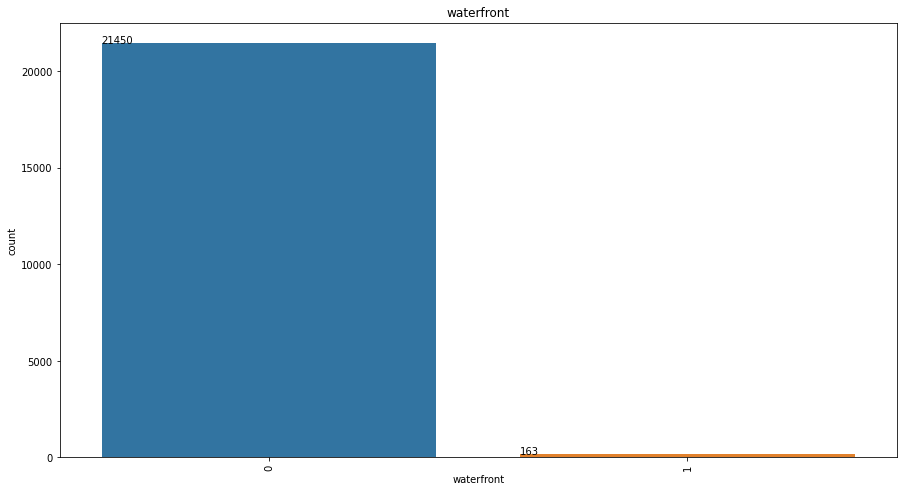

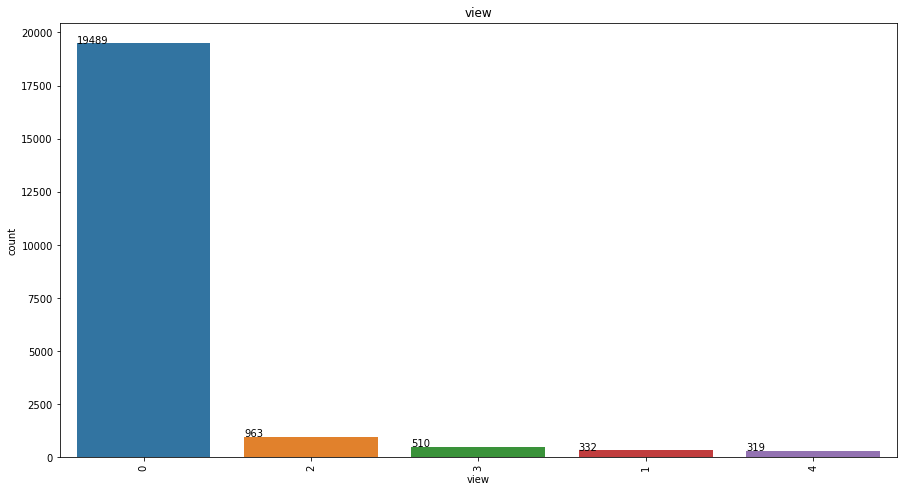

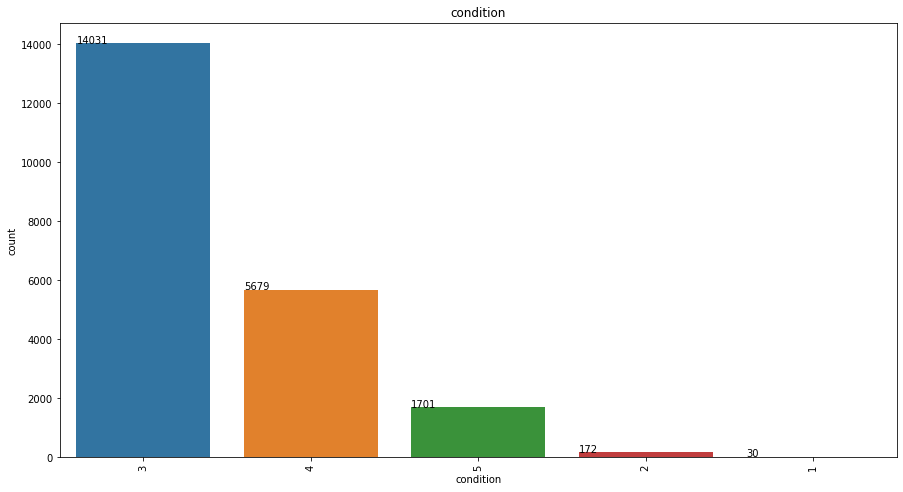

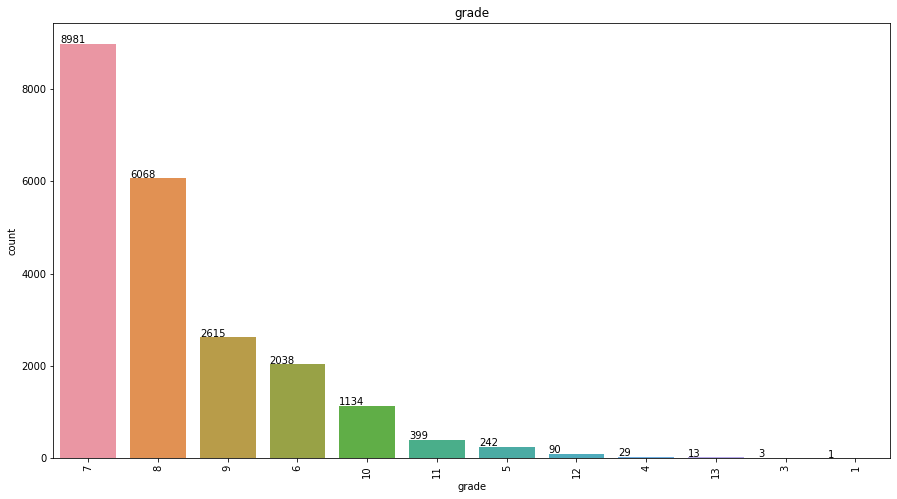

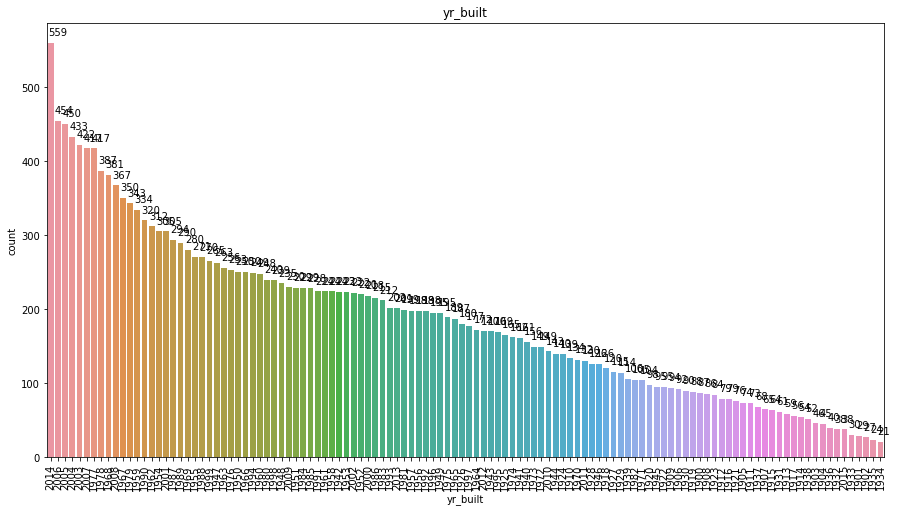

In [ ]:
for column in categorical:
    show_counts(df,column)

#### Categorical Counts Observations

<div style='background:coral;font-size:15px'> 

<b> Observations: </b>

* It can be seen that 90% of the homes sold are with a 0 view.
* It can be seen that 41% of the houses are with a grade 7
* It can be seen that most of the homes sold (559) were new built 2014
    
</div>

### Bivariate Analysis

#### numeric to numeric

In [ ]:
cols   = ['price','bedrooms', 'view', 'condition', 'grade' ,'floors','sqft_living', 'sqft_lot']

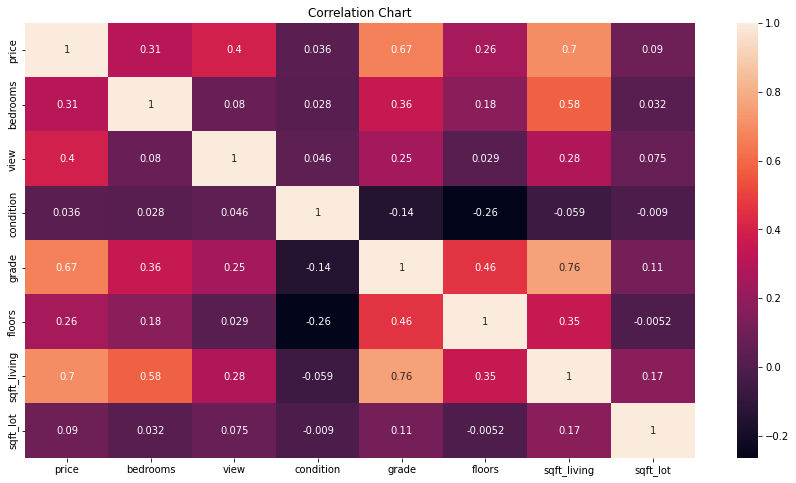

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(salesusa[cols].corr(),annot=True)\
.set(title =  'Correlation Chart');

Visaulizing the correlation of grade & price, and grade & sqft_living

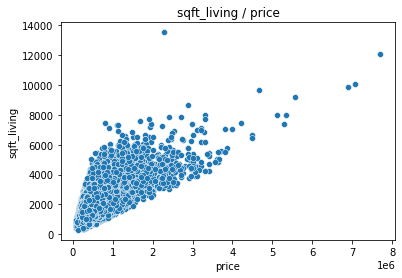

In [ ]:
sns.scatterplot(data=salesusa, x='price', y='sqft_living')\
.set(title = 'sqft_living / price');

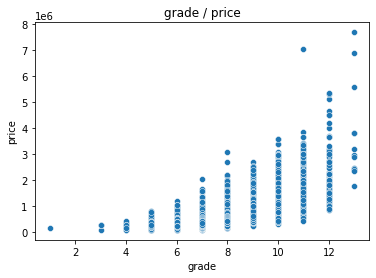

In [ ]:
sns.scatterplot(data=salesusa, x='grade', y='price')\
.set(title = 'grade / price');

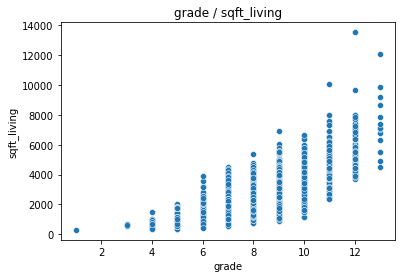

In [ ]:
sns.scatterplot(data=salesusa, x='grade', y='sqft_living')\
.set(title = 'grade / sqft_living');

#### Numeric to Numeric Observations

<div style='background:coral;font-size:15px'> 
<b> Observations </b> 
<ul>
    <li> It can be seen that the grade and sqft_living are the most influential on the price of the property </li>
    <li> There isn't much of a relation between grade and sqft_living. </li>
  
</ul>
</div>

#### categorical to numeric

##### Visualizing Price by view

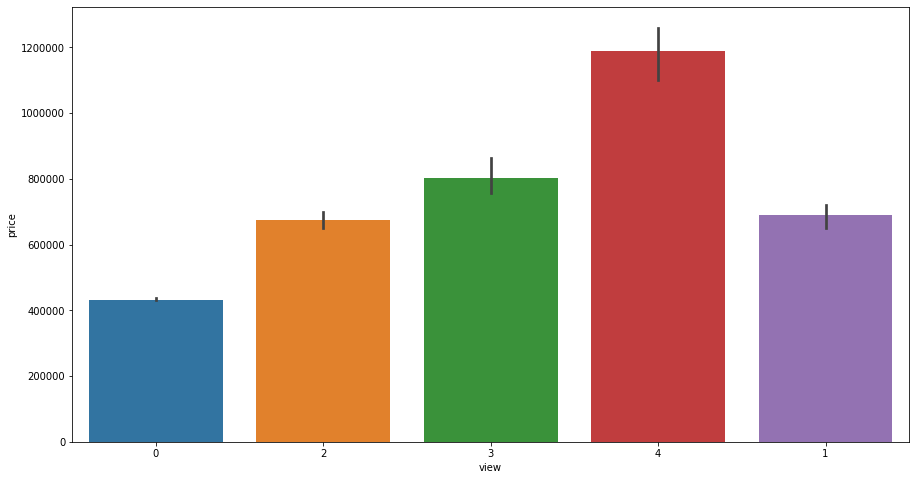

In [ ]:
view_order=salesusa.groupby('view').agg(priceperview = ('price','sum'))\
.sort_values('priceperview',ascending=False).index

plt.figure(figsize=(15,8))
sns.barplot(data=salesusa, 
            y='price', 
            x='view',
            estimator=np.median,
            order = view_order)\
.ticklabel_format(style='plain', axis='y');

##### Visualizing Price by grade

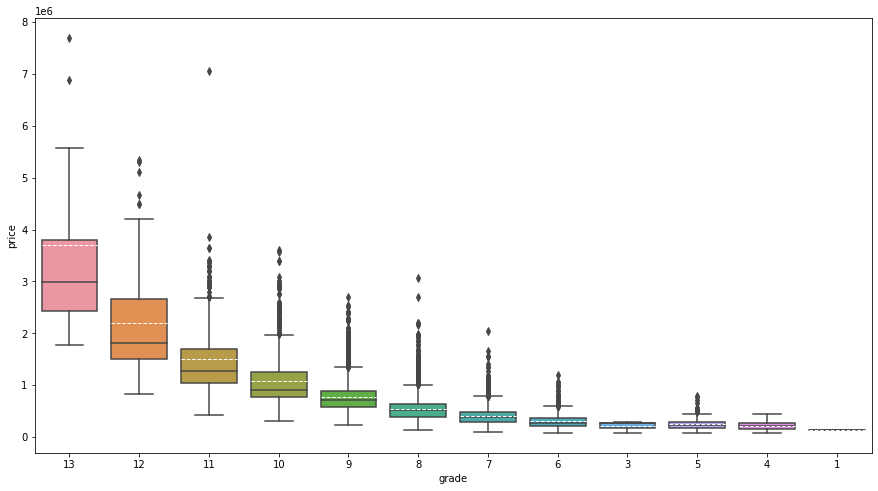

In [ ]:
df=salesusa.groupby('grade').agg(priceperview = ('price','median'))\
.sort_values('priceperview',ascending=False).index

plt.figure(figsize=(15,8))
sns.boxplot(x = 'grade',
            y = 'price',
            data = salesusa,
            order = df,
            showmeans=True,
            meanline=True,
            meanprops={'color':'white'});

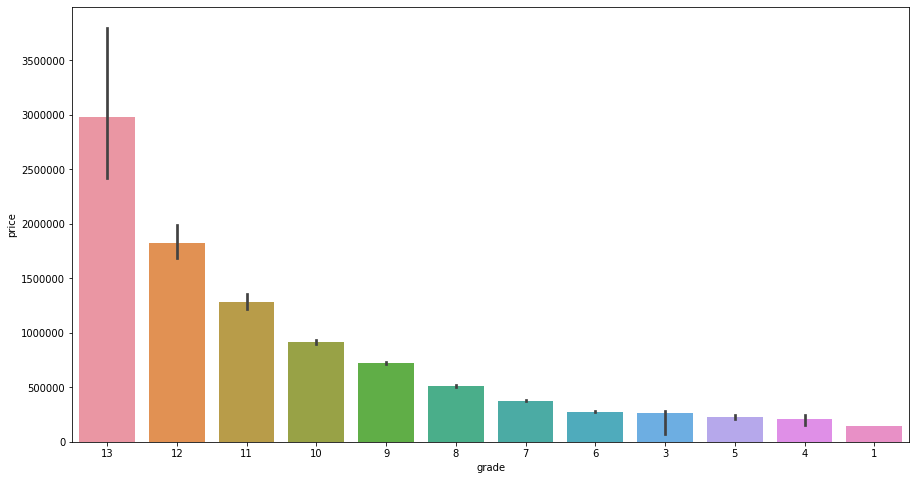

In [ ]:
grade_order=salesusa.groupby('grade').agg(priceperview = ('price','median'))\
.sort_values('priceperview',ascending=False).index

plt.figure(figsize=(15,8))
sns.barplot(data=salesusa, 
            y='price', 
            x='grade',
            estimator=np.median,
            order = grade_order)\
.ticklabel_format(style='plain', axis='y');

##### Visualizing Price by grade & grade

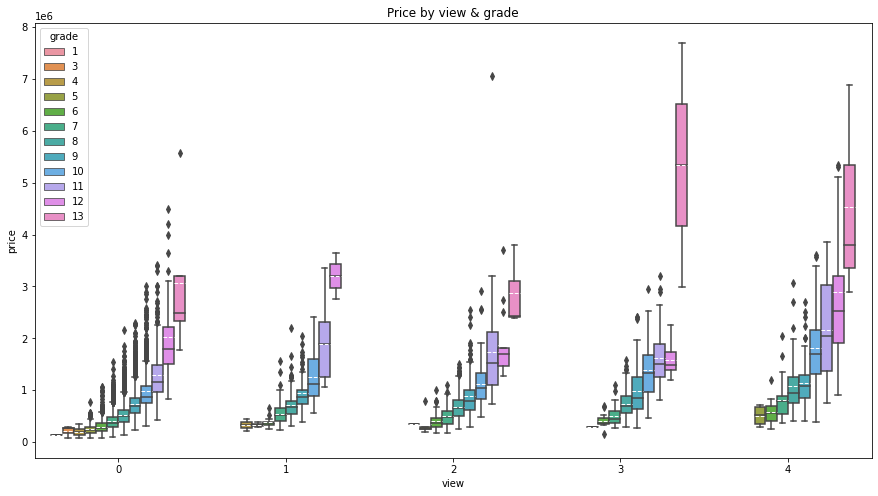

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=salesusa, y='price', 
            x='view', hue='grade', 
            showmeans=True, meanline=True, meanprops={'color':'white'}, orient='v')\
.set(title = 'Price by view & grade');

In [ ]:
salesusa.groupby('yr_built').agg(avgprice = ('price','mean')).sort_values('avgprice',ascending=False).head()

,avgprice
yr_built,
1933,"772,483.33"
2015,"759,970.95"
1905,"753,443.93"
2001,"741,340.04"
1909,"696,448.99"


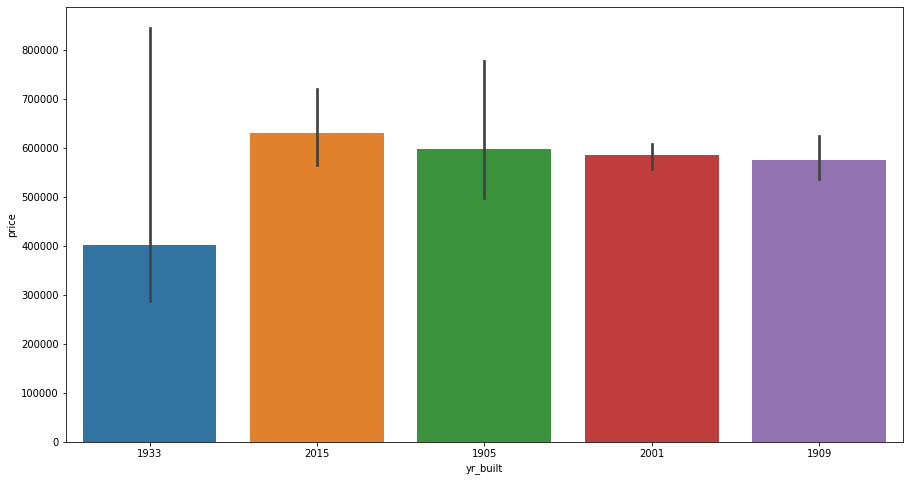

In [ ]:
yr_built_order=salesusa.groupby('yr_built').agg(priceperview = ('price','mean'))\
.sort_values('priceperview',ascending=False).head().index

plt.figure(figsize=(15,8))
sns.barplot(data=salesusa, 
            y='price', 
            x='yr_built',
            estimator=np.median,
            order = yr_built_order)\
.ticklabel_format(style='plain', axis='y');

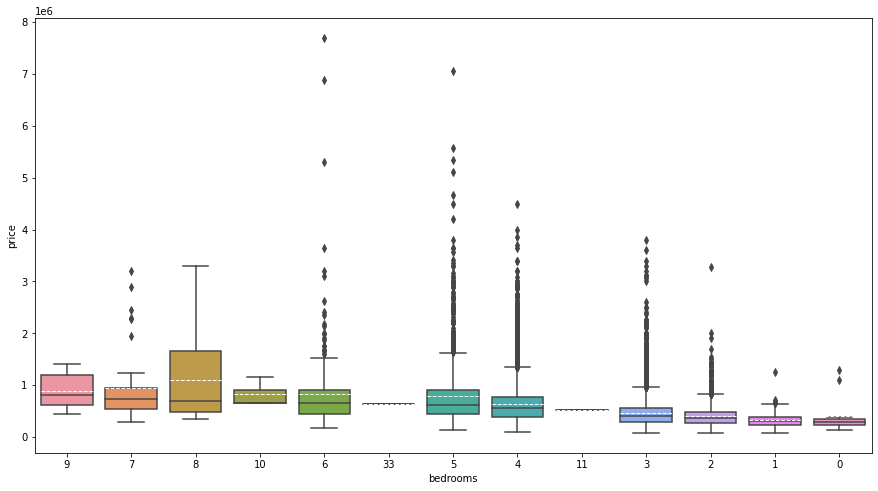

In [ ]:
df=salesusa.groupby('bedrooms').agg(priceperview = ('price','median'))\
.sort_values('priceperview',ascending=False).index

plt.figure(figsize=(15,8))
sns.boxplot(x = 'bedrooms',
            y = 'price',
            data = salesusa,
            order = df,
            showmeans=True,
            meanline=True,
            meanprops={'color':'white'});

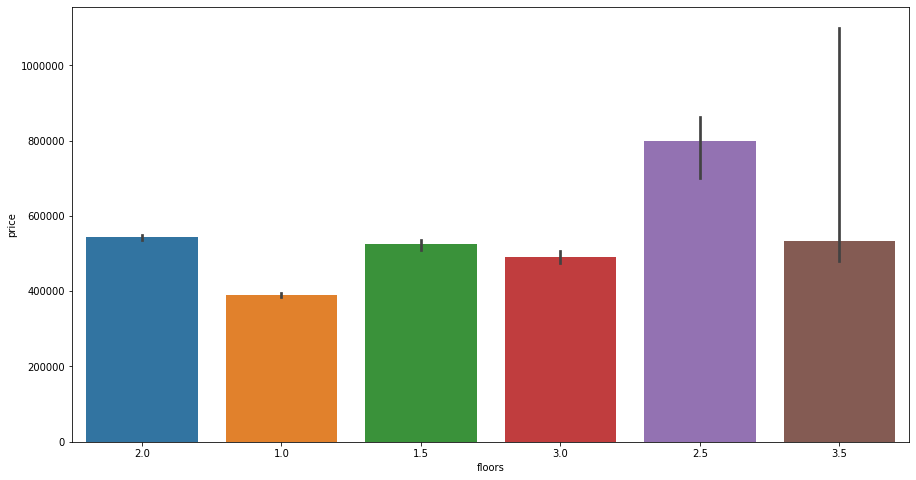

In [ ]:
floors_order=salesusa.groupby('floors').agg(priceperview = ('price','sum'))\
.sort_values('priceperview',ascending=False).index

plt.figure(figsize=(15,8))
sns.barplot(data=salesusa, 
            y='price', 
            x='floors',
            estimator=np.median,
            order = floors_order)\
.ticklabel_format(style='plain', axis='y');

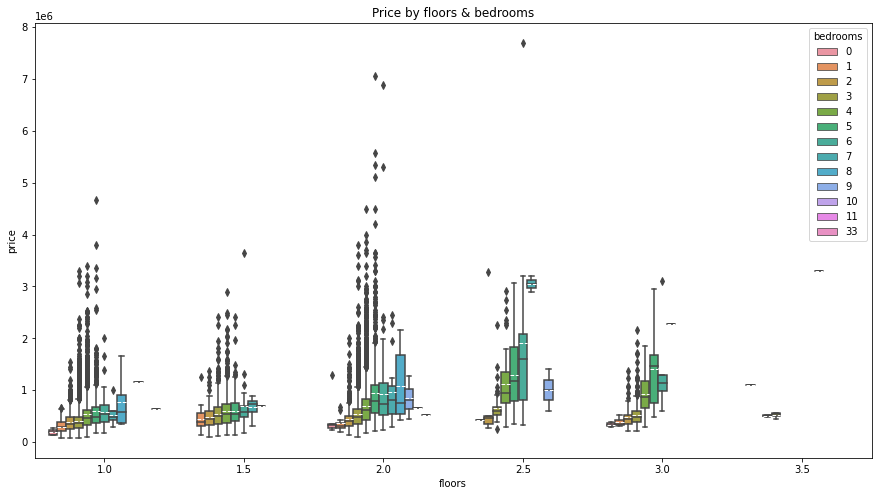

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=salesusa, y='price', 
            x='floors', hue='bedrooms', 
            showmeans=True, meanline=True, meanprops={'color':'white'}, orient='v')\
.set(title = 'Price by floors & bedrooms');

##### Price by grade, floors, bedrooms, view, yr_built  - Observations

<div style='background:coral;font-size:15px'> 

<b> Observations </b>
    
<u> view </u>
* You can see that the higher the view, the higher the price
* view 4 is the higher price

  
<u> grade </u>
* You can see that the higher the score, the higher the price
* grade 13 is the higher price

<u> grade & view </u>
* It can be seen that view 3 and grade 13 are the highest prices

<u> yr_built </u>
* It can be seen that in 2015, 1905, 2001, 1909 the prices are the highest

<u> batrooms </u>
* It can be seen that homes with 8 batrooms have the highest prices

<u> floors </u>
* It can be seen that houses with 2.5 floors prices are high

<u> floors &  bedrooms </u>
* It can be seen that the combination of 2.5 floors and 8 rooms the highest prices

</div>

#### categorical to categorical

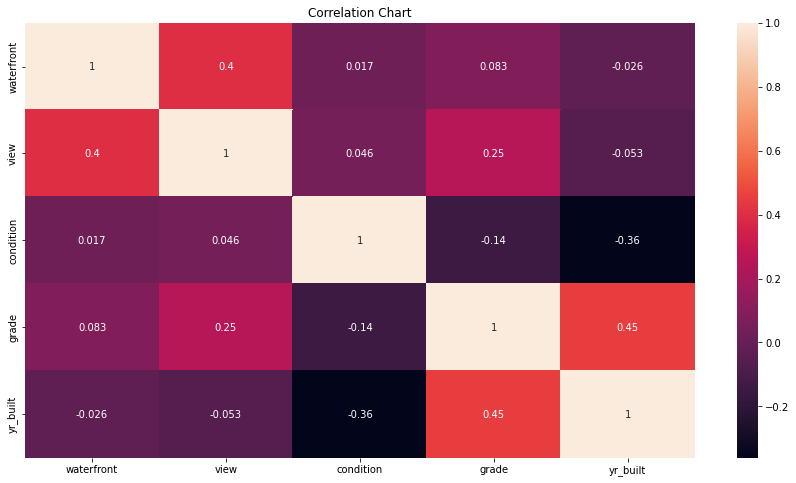

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(salesusa[categorical].corr(),annot=True)\
.set(title =  'Correlation Chart');

In [ ]:
categorical = ['waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated']
numerical   = ['price', 'bedrooms', 'floors','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

### Time Series Analysis

Averge of price sales every year

In [ ]:
salesusa.assign(year = salesusa['date'].dt.year)\
.groupby('year').agg(avgpriceperyear = ('price','mean'))

,avgpriceperyear
year,
2014,"539,280.46"
2015,"542,072.50"


Averge of price sales every year and every month

In [ ]:
salesusa.assign(month = salesusa['date'].dt.month,
                year = salesusa['date'].dt.year)\
.groupby(['year','month']).agg(avgpricepermonth = ('price','mean'))\
.sort_values(['year','month'],ascending=False)

avgpricepermonth
year month                  
2015 5            558,193.10
     4            561,933.46
     3            544,057.68
     2            507,919.60
     1            525,963.25
...                      ...
2014 9            529,315.87
     8            536,527.04
     7            544,892.16
     6            558,123.74
     5            548,166.60

[13 rows x 1 columns]

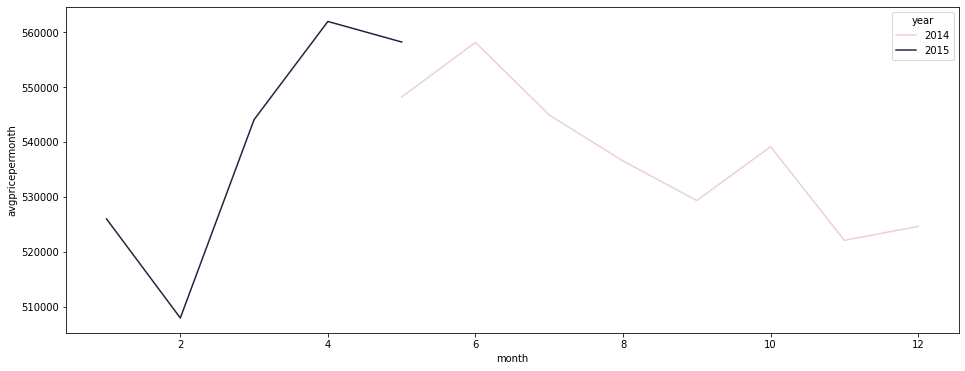

In [ ]:
df=salesusa.assign(month = salesusa['date'].dt.month,
                year = salesusa['date'].dt.year)\
.groupby(['year','month']).agg(avgpricepermonth = ('price','mean'))\
.sort_values(['year','month'],ascending=False).index()

plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x='month', y='avgpricepermonth', hue='year');

Add a column of house age at the time of sale

In [ ]:
salesusa['age'] = salesusa['date'].dt.year - salesusa['yr_built']

fil=salesusa['age']==-1
salesusa[fil].head(2)

,id,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,age
1763,1832100030,2014-06-25,"597,326.00",4,3570,8250,2.00,0,0,3,10,2860,710,2015,0,98040,47.58,-122.23,-1
2687,3076500830,2014-10-29,"385,195.00",1,710,6000,1.50,0,0,3,6,710,0,2015,0,98144,47.58,-122.32,-1


In [ ]:
def rank1(columns):
  if 1 <= columns <= 5:
      return '1-5'
  elif 6 <= columns <= 10:
      return '6-10'    
  elif 11 <= columns <= 25:
      return '11-25'
  elif 26 <= columns <= 50:
      return '26-50'
  elif 51 <= columns <= 75:
      return '51-75'
  elif 76 <= columns <= 100:
      return '76-100'        
  elif  columns > 100:
      return '100+'
  else:
      return('<1')

In [ ]:
salesusa['range'] = salesusa['age'].apply(rank1)

<Figure size 1296x576 with 0 Axes>

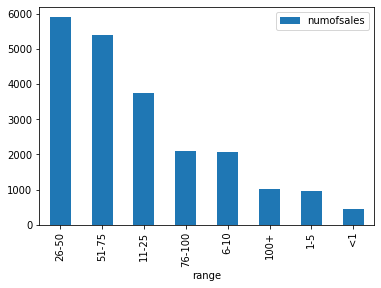

In [ ]:
plt.figure(figsize=(18, 8))
salesusa.groupby('range').agg(numofsales = ('id','size'))\
.sort_values('numofsales',ascending=False)\
.plot(kind='bar');

<Figure size 1296x576 with 0 Axes>

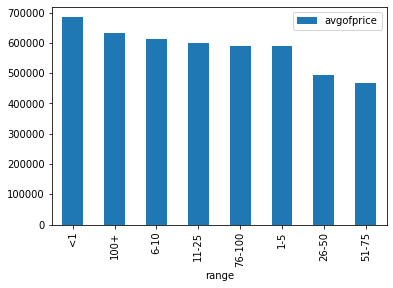

In [ ]:
plt.figure(figsize=(18, 8))
salesusa.groupby('range').agg(avgofprice = ('price','mean'))\
.sort_values('avgofprice',ascending=False)\
.plot(kind='bar');